In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

In [172]:
K = 5                                                 # number of articles (arms)
user_types = ("female over 25", "male over 25" , "male under 25", "female under 25")  # possible different types of users
U = len(user_types)                                   # amount of different users
T = 10000                                             # horizon
N = 20

print("N =",N)
print(N*K*U) # exploration rounds

# click probabilities
true_click_probs = np.array([
    [0.8, 0.6, 0.5, 0.4, 0.2],      # female over 25
    [0.2, 0.4, 0.5, 0.6, 0.8],      # male over 25
    [0.2, 0.4, 0.8, 0.6, 0.5],      # male under 25
    [0.2, 0.4, 0.8, 0.6, 0.5]       # female under 25 (similar preferences)
    ])
best_article_click_probs = np.max(true_click_probs, axis=1)

N = 20
400


In [173]:
df = pd.DataFrame(
    true_click_probs,
    index=["Female over 25", "Male over 25", "Male under 25", "Female under 25"],
    columns=["Article 1 (p1)", "Article 2 (p2)", "Article 3 (p3)", "Article 4 (p4)", "Article 5 (p5)"]
)

In [174]:
df

,Article 1 (p1),Article 2 (p2),Article 3 (p3),Article 4 (p4),Article 5 (p5)
Female over 25,0.8,0.6,0.5,0.4,0.2
Male over 25,0.2,0.4,0.5,0.6,0.8
Male under 25,0.2,0.4,0.8,0.6,0.5
Female under 25,0.2,0.4,0.8,0.6,0.5


In [175]:
U = df.shape[0] # different type of users
K = df.shape[1] # number of articles
print(f"U = {U}\nK = {K}")

U = 4
K = 5


In [176]:
article_clicks_amount = np.ones(K) # gets the number of clicks for each article
sums_of_rewards = np.zeros(K)      # sums of rewards for each arm
articles_clicked = np.zeros(T)     # articles that were clicked at time t
regret = np.zeros(T)           
best_score = np.zeros(T)
alg_score = np.zeros(T)
inst_score = np.zeros(T)
total_reward = 0
cumulative_optimal_reward = 0

for t in range(1, T+1):    # for each user T = t -> T % U 
    # user_index = (t - 1) % U
    user_index = np.random.randint(U)
    best_article_reward = best_article_click_probs[user_index]
    article = 0
    max_upper_bound = 0

    # get the upper bound for current t
    for i in range(K):   # for each article 
        # the more you select an article, you are more likely to not to select (diving by article's clicks)
        # although if while clicking you get a positive reward the greater the chances to click again
        average_reward = sums_of_rewards[i] / article_clicks_amount[i] # get the average reward 
        delta_i = math.sqrt(3/2 * math.log(t) / article_clicks_amount[i]) # get the delta_i
        current_upper_bound = average_reward + delta_i

        if current_upper_bound > max_upper_bound:
            max_upper_bound = current_upper_bound
            article = i 

    reward = np.random.binomial(1,p=df.iloc[user_index, article])  # get a reward for arm j for current user
    # reward = df.iloc[t%U, article] # if possibilities were  { 0 , 1}
    #print(reward)
    inst_score[t-1] = reward
    
    articles_clicked[t-1] = article
    sums_of_rewards[article] += reward # increase article's reward
    article_clicks_amount[article] += 1        
    total_reward += reward

    if t > 1:
        best_score[t-1] = best_score[t-2] + best_article_reward
        alg_score[t-1] = alg_score[t-2] + reward
    else:
        best_score[t-1] = best_article_reward
        alg_score[t-1] = reward
    
    regret[t-1] = (best_score[t-1] - alg_score[t-1])

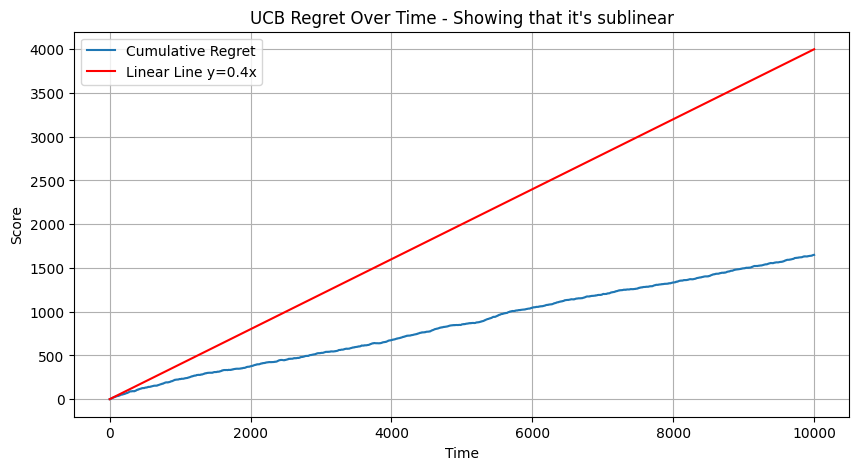

In [177]:
plt.figure(figsize=(10, 5))
plt.plot(regret, label='Cumulative Regret')
x_linear = np.arange(1, T+1)
a = 0.4
y_linear = a * x_linear  # Adjusted slope to match scale of regret
plt.plot(x_linear, y_linear, label=f'Linear Line y={str(a)}x', color='red')
plt.xlabel('Time')
plt.ylabel('Score')
plt.title("UCB Regret Over Time - Showing that it's sublinear")
plt.legend()
plt.grid()
plt.show()

In [178]:
from collections import Counter
Counter(articles_clicked)

Counter({2.0: 8616, 3.0: 896, 4.0: 253, 1.0: 169, 0.0: 66})

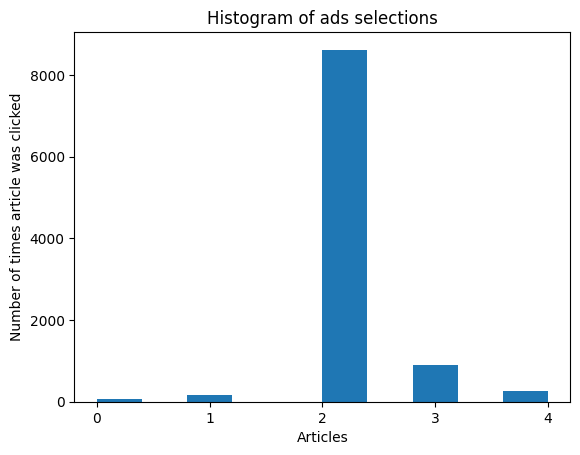

In [179]:
plt.hist(articles_clicked)
plt.title('Histogram of ads selections')
plt.xlabel('Articles')
plt.ylabel('Number of times article was clicked')
plt.locator_params(axis='x', integer=True)